In [1]:
!pip install missingno

In [2]:
!pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.6
anaconda-project==0.8.2
asn1crypto==0.24.0
astroid==2.1.0
astropy==3.1
atomicwrites==1.2.1
attrs==18.2.0
Babel==2.6.0
backcall==0.1.0
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.3
bitarray==0.8.3
bkcharts==0.2
blaze==0.11.3
bleach==3.0.2
bokeh==1.0.2
boto==2.49.0
Bottleneck==1.2.1
certifi==2018.11.29
cffi==1.11.5
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
clyent==1.2.2
colorama==0.4.1
comtypes==1.1.7
conda==4.5.12
conda-build==3.17.6
conda-verify==3.1.1
contextlib2==0.5.5
cryptography==2.4.2
cycler==0.10.0
Cython==0.29.2
cytoolz==0.9.0.1
dask==1.0.0
datashape==0.5.4
decorator==4.3.0
defusedxml==0.5.0
distributed==1.25.1
docutils==0.14
entrypoints==0.2.3
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==3.0.10
Flask==1.0.2
Flask-Cors==3.0.7
future==0.17.1
gevent==1.3.7
glob2==0.6
greenlet==0.4.15
h5py==2.8.0
heapdict==1.0.0
html5lib==1.0.1
idna==2.8
imageio==2.4.1
imagesize==1.1.0
impor

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline
from calendar import day_name

In [4]:
# importing datasheet 
data1 = pd.read_csv('example_sprit_cut_station.csv', sep=';')
data2 = pd.read_csv('example_sprit_cut_prices.csv',sep=';')

In [5]:
data1.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [6]:
data2.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [7]:
data1.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [8]:
data2.shape

(2189526, 6)

In [9]:
data1.shape

(824, 12)

# Data Cleaning

In [10]:
#Function to drop records of negative prices of different fuels
def drop_neg(col_name):
    col_neg = data2[data2[col_name]<=0]
    data2.drop(col_neg.index,axis=0,inplace=True)

In [11]:
drop_neg('E5')
drop_neg('E10')
drop_neg('DIESEL')

In [12]:
data2.shape  #(2154982, 6)

(2150850, 6)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    820 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


In [14]:
# Cleaning PostCode column
data1['POST_CODE'].fillna(value=0, inplace=True)

In [15]:
data1['POST_CODE'].replace(to_replace=['\\N'],value='0',inplace=True)
data1['POST_CODE'].replace(to_replace=['nicht'],value='0',inplace=True)

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    824 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


In [17]:
data1.BRAND.unique()

array(['ARAL', 'JET', 'Supermarkt-Tankstelle am real- Markt',
       'Tankhof Iffezheim', 'Schiffer & Nicklaus GmbH', nan,
       'Sefrin Heizöl & Kraftstoffe', 'bft', 'Markant', 'AVIA',
       'nicht mehr aktiv', 'Bft', 'Freie Tankstelle',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'HEM',
       'Fritz Walter GmbH', 'TAMOIL', 'Freie', 'rnt', '\\N',
       'Schuster & Sohn KG', 'Raiffeisen', 'E Center',
       'Eberhardt Jöhlingen', 'BFT', 'Agip', 'Winkler',
       'Mr. Wash Autoservice AG', 'ESSO', 'ZG Raiffeisen Energie',
       'Supermarkt-Tankstelle', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Supermarkt Tankstelle', 'Raiffeisen Tankstelle', 'Preis', 'mtb',
       'Tankcenter', 'TS ARNT', 'frei', 'OMV', 'Frühmesser GmbH', 'OIL!',
       'SB Markt', 'SB', 'TOTAL', 'ED', 'SB-Markttankstelle',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493', 'Total',
       'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'],
      dtype=object)

In [18]:
data1.BRAND.unique().shape

(56,)

In [19]:
# cleaning BRANDS COLUMN
inactiv_brands=data1[data1['BRAND']=='nicht mehr aktiv']

In [20]:
inactiv_brands

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
22,82e92aca-b1ec-4bcf-3ab5-f192910c2716,621,2015-04-27 23:01:58.000000,nicht mehr aktiv,nicht mehr aktiv,nicht mehr aktiv,NaN,0,mehr aktiv,deRP,49.485311,8.414499
117,82e92aca-b1ec-4bcf-3ab5-f192910c2716,621,2015-04-27 23:01:58.000000,nicht mehr aktiv,nicht mehr aktiv,nicht mehr aktiv,NaN,0,mehr aktiv,deRP,49.485311,8.414499


In [21]:
data1.drop(inactiv_brands.index,axis=0,inplace=True)

In [22]:
data1.BRAND.unique().shape

(55,)

In [23]:
data1['BRAND'].fillna(value='No Brand',inplace=True)

In [24]:
data1['BRAND'].replace(to_replace=['\\N'],value='No Brand',inplace=True)

In [25]:
data1['BRAND'].replace(to_replace=['Supermarkt-Tankstelle'],value='Supermarkt Tankstelle',inplace=True)

In [26]:
data1.BRAND.unique().shape

(53,)

In [27]:
data1['BRAND']=data1['BRAND'].str.upper()

In [28]:
data1.BRAND.unique().shape

(49,)

In [29]:
data1['BRAND'].replace(to_replace=['FREIE'],value='FREIE TANKSTELLE',inplace=True)

In [30]:
data1.describe()

,VERSION,LAT,LNG
count,822.000000,822.000000,822.000000
mean,130.236010,49.321829,8.190684
std,268.925023,0.254904,0.283358
min,1.000000,48.800790,7.505350
25%,1.000000,49.104557,8.106345
50%,4.000000,49.373610,8.289295
75%,22.000000,49.510307,8.404669
max,881.000000,49.799397,8.499941


In [31]:
data2.shape

(2150850, 6)

In [32]:
#deleting duplicate records
data2.drop_duplicates(inplace=True)

In [33]:
data2.shape

(1075425, 6)

In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075425 entries, 0 to 2177846
Data columns (total 6 columns):
STID            1075425 non-null object
E5              1075425 non-null int64
E10             1075425 non-null int64
DIESEL          1075425 non-null int64
DATE_CHANGED    1075425 non-null object
CHANGED         1075425 non-null int64
dtypes: int64(4), object(2)
memory usage: 57.4+ MB


In [35]:
data2['DATE_CHANGED']=pd.to_datetime(data2.DATE_CHANGED)

In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075425 entries, 0 to 2177846
Data columns (total 6 columns):
STID            1075425 non-null object
E5              1075425 non-null int64
E10             1075425 non-null int64
DIESEL          1075425 non-null int64
DATE_CHANGED    1075425 non-null datetime64[ns]
CHANGED         1075425 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 57.4+ MB


In [37]:
data1.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [38]:
data1.rename(columns={'ID':'STID'}, inplace=True)

In [39]:
data1.head()

,STID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [40]:
df= pd.merge(data2,data1, on='STID')

In [41]:
df.shape

(2150838, 17)

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.shape

(1075419, 17)

In [44]:
#brand_start_id=d2.groupby('BRAND')['ID'].min().reset_index()
df['BRAND']=np.where(df['BRAND']== 'NO BRAND', df['NAME'], df['BRAND'])

In [45]:
brands = df[['BRAND','DATE_CHANGED']]

In [46]:
brands.head()

,BRAND,DATE_CHANGED
0,ESSO,2014-10-02 05:22:01
2,ESSO,2014-10-02 05:26:01
4,ESSO,2014-10-02 09:06:01
6,ESSO,2014-10-03 12:14:01
8,ESSO,2014-10-03 14:14:01


In [47]:
brand_start_date=df.groupby('BRAND')['DATE_CHANGED'].min().reset_index()
brand_end_date=df.groupby('BRAND')['DATE_CHANGED'].max().reset_index()

In [48]:
min_date=brand_start_date['DATE_CHANGED']
max_date=brand_end_date['DATE_CHANGED']
no_days=max_date-min_date
days=no_days.apply(lambda x: x.days)

In [49]:
brand_start_date.DATE_CHANGED=days

In [50]:
brand_start_date

,BRAND,DATE_CHANGED
0,AGIP,478
1,ARAL,478
2,AUTO ZOTZ HERXHEIM B.LD. TANKEN AN L.493,477
3,AUTO ZOTZ LANDAU IN DER PFALZ TANKEN UND WAS...,477
4,AVIA,478
5,BFT,478
6,CLASSIC,478
7,Dudenhöffer & Rung GmbH,477
8,E CENTER,478
9,EBERHARDT JÖHLINGEN,477


# 1. How many different brands exist in the data set and what is the existing history in days (bar chart)?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

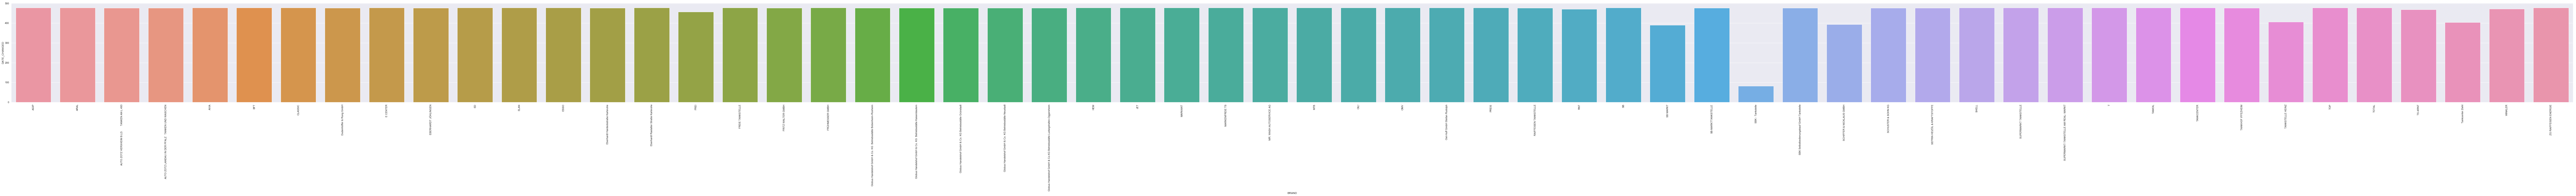

In [51]:
sns.set(rc={'figure.figsize':(201,8)})
q1=sns.barplot(x="BRAND",y="DATE_CHANGED",data=brand_start_date)
plt.xticks(rotation=90)

In [52]:
gas_weakly= df[['BRAND', 'E5', 'E10', 'DIESEL','DATE_CHANGED']]

# 2. What is the min, mean, max price for each gasoline type weekly (time series graph)

In [53]:
dff=df

In [54]:
dff.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847


In [55]:
d1=dff

In [56]:
# function to remove the outliers
def drop_outliers(y):
    data_mean, data_std= d1[y].mean(),d1[y].std()
    cut_off=data_std*3
    lower,upper= data_mean- cut_off, data_mean+cut_off
    d1[y]=np.where(np.logical_or(d1[y]<lower,d1[y]>upper),d1[y].median(),d1[y])

In [57]:
drop_outliers('E5')
drop_outliers('E10')
drop_outliers('DIESEL')

Text(0, 0.5, 'Price in Euros')

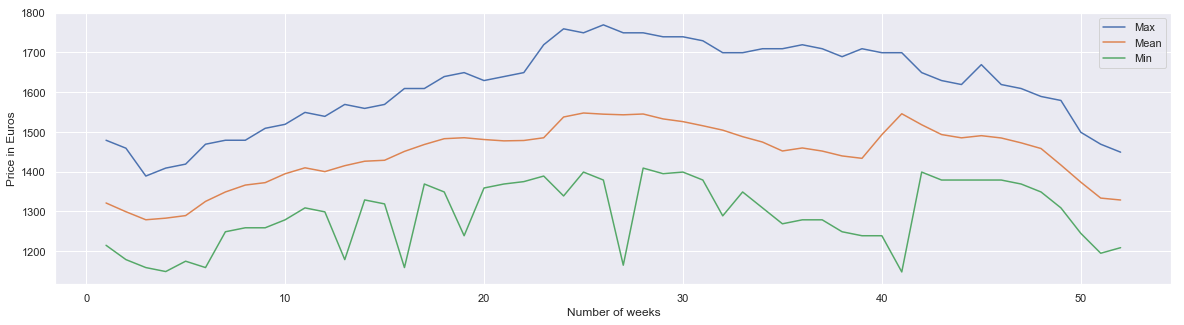

In [58]:
plt.figure(figsize=(20,5))
max_plot_e5 = d1.groupby(d1.DATE_CHANGED.dt.week).E5.max().plot(label='Max')
mean_plot_e5 = d1.groupby(d1.DATE_CHANGED.dt.week).E5.mean().plot(label='Mean')
min_plot_e5 = d1.groupby(d1.DATE_CHANGED.dt.week).E5.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')

Text(0, 0.5, 'Price in Euros')

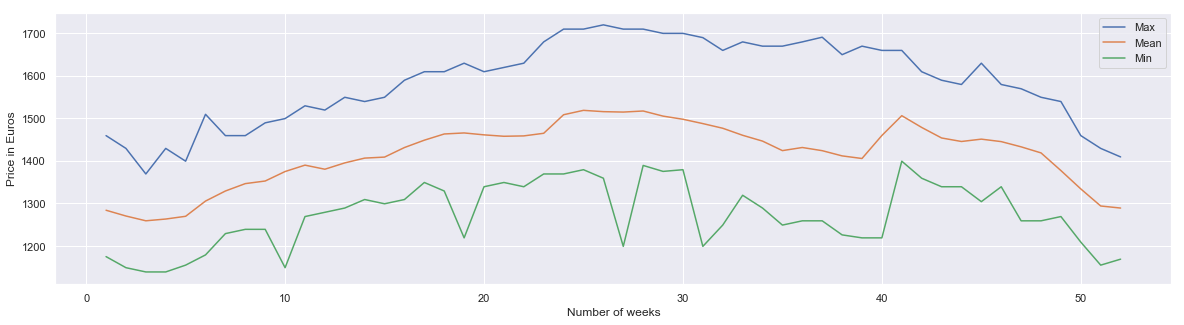

In [59]:
plt.figure(figsize=(20,5))
max_plot_e10 = d1.groupby(d1.DATE_CHANGED.dt.week).E10.max().plot(label='Max')
mean_plot_e10 = d1.groupby(d1.DATE_CHANGED.dt.week).E10.mean().plot(label='Mean')
min_plot_e10 = d1.groupby(d1.DATE_CHANGED.dt.week).E10.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')

Text(0, 0.5, 'Price in Euros')

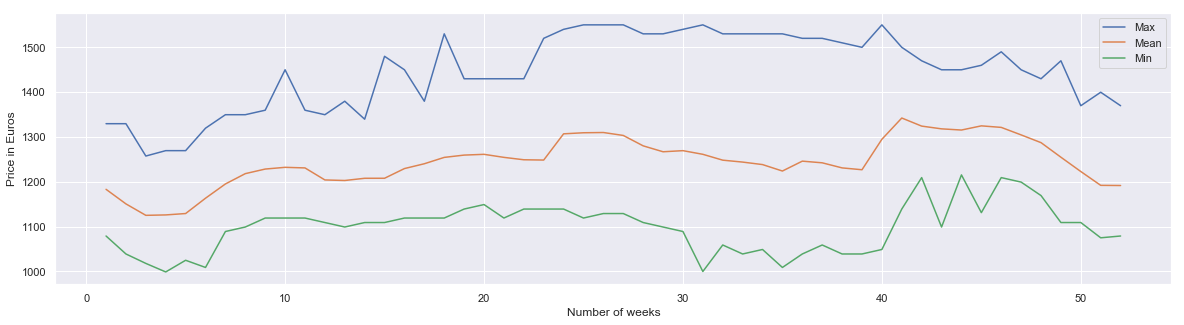

In [60]:
plt.figure(figsize=(20,5))
max_plot_D = d1.groupby(d1.DATE_CHANGED.dt.week).DIESEL.max().plot(label='Max')
mean_plot_D = d1.groupby(d1.DATE_CHANGED.dt.week).DIESEL.mean().plot(label='Mean')
min_plot_D = d1.groupby(d1.DATE_CHANGED.dt.week).DIESEL.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')

# 3. What is cheapest station (in average), why is it the cheapest

# Cheapest station in average is "Ludwigshafen Industriestr. 51" of Brand "HEM"

In [61]:
cheap_stn_E5=d1.groupby('STID')['E5'].min().sort_values().reset_index()
cheap_stn_E10=d1.groupby('STID')['E10'].min().sort_values().reset_index()
cheap_stn_D=d1.groupby('STID')['DIESEL'].min().sort_values().reset_index()

In [62]:
cheap_stn_E5.head()

,STID,E5
0,8884eb23-71e2-477f-b07a-1085619e7063,1148.0
1,e1a15081-25b6-9107-e040-0b0a3dfe563c,1149.0
2,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1159.0
3,a3c6ca46-73ea-4adf-a36b-0334c0ff6472,1159.0
4,2d74b7b9-b9fe-483a-84fd-a1aabd59079b,1159.0


In [63]:
cheap_stn_E10.head()

,STID,E10
0,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1139.0
1,51d4b69f-a095-1aa0-e100-80009459e03a,1139.0
2,e1a15081-25b6-9107-e040-0b0a3dfe563c,1139.0
3,51d4b4e4-a095-1aa0-e100-80009459e03a,1149.0
4,f35ba2a2-964a-43ce-af2b-d22a6b0d53c9,1149.0


In [64]:
cheap_stn_D.head()

,STID,DIESEL
0,e1a15081-25b6-9107-e040-0b0a3dfe563c,999.0
1,51d4b4e4-a095-1aa0-e100-80009459e03a,999.0
2,51d4b69f-a095-1aa0-e100-80009459e03a,999.0
3,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,999.0
4,f0a63434-d85b-4a06-a583-11724f884450,1000.0


In [65]:
x=pd.merge(cheap_stn_E5,cheap_stn_E10)

In [66]:
cheap_stn=pd.merge(x,cheap_stn_D)

In [67]:
cheap_stn['mean']=cheap_stn.mean(axis=1)

In [68]:
cheap_stn.sort_values(by='mean')

,STID,E5,E10,DIESEL,mean
1,e1a15081-25b6-9107-e040-0b0a3dfe563c,1149.0,1139.0,999.0,1095.666667
2,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1159.0,1139.0,999.0,1099.000000
6,51d4b69f-a095-1aa0-e100-80009459e03a,1159.0,1139.0,999.0,1099.000000
8,51d4b4e4-a095-1aa0-e100-80009459e03a,1169.0,1149.0,999.0,1105.666667
7,e69a923a-ba11-409b-2720-2b908ed66498,1165.0,1155.0,1025.0,1115.000000
18,16c7cc25-cfdf-4e18-81b3-90d7f17f35fe,1189.0,1159.0,1009.0,1119.000000
9,a21e3ed2-6d03-478f-32a3-9f33202182bc,1175.0,1155.0,1035.0,1121.666667
4,2d74b7b9-b9fe-483a-84fd-a1aabd59079b,1159.0,1169.0,1039.0,1122.333333
3,a3c6ca46-73ea-4adf-a36b-0334c0ff6472,1159.0,1199.0,1009.0,1122.333333
23,d2a7a921-f817-4b88-8987-0b757ab09e38,1189.0,1169.0,1029.0,1129.000000


In [69]:
d1.loc[dff['STID']=='e1a15081-25b6-9107-e040-0b0a3dfe563c']

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
819832,e1a15081-25b6-9107-e040-0b0a3dfe563c,1449.0,1429.0,1189.0,2015-06-14 21:26:01,20,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819834,e1a15081-25b6-9107-e040-0b0a3dfe563c,1539.0,1519.0,1279.0,2015-06-14 23:10:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819836,e1a15081-25b6-9107-e040-0b0a3dfe563c,1529.0,1509.0,1259.0,2015-06-15 03:42:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819838,e1a15081-25b6-9107-e040-0b0a3dfe563c,1509.0,1489.0,1239.0,2015-06-15 06:46:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819840,e1a15081-25b6-9107-e040-0b0a3dfe563c,1529.0,1509.0,1259.0,2015-06-16 03:46:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819842,e1a15081-25b6-9107-e040-0b0a3dfe563c,1509.0,1489.0,1259.0,2015-06-16 06:46:01,20,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819844,e1a15081-25b6-9107-e040-0b0a3dfe563c,1509.0,1489.0,1229.0,2015-06-16 06:50:01,1,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819846,e1a15081-25b6-9107-e040-0b0a3dfe563c,1499.0,1479.0,1219.0,2015-06-16 08:46:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819848,e1a15081-25b6-9107-e040-0b0a3dfe563c,1489.0,1469.0,1209.0,2015-06-17 09:14:01,1,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819850,e1a15081-25b6-9107-e040-0b0a3dfe563c,1499.0,1479.0,1219.0,2015-06-18 09:14:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048


# 4. At which day of a weak is the price most likely the cheapest (week profile)

# Fuel prices are cheaper on "Saturday"

In [70]:
da=d1

In [71]:
da

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
10,01bf5a06-4248-43a5-9524-56123fa3ab2f,1629.0,1589.0,1429.0,2014-10-04 23:10:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
12,01bf5a06-4248-43a5-9524-56123fa3ab2f,1549.0,1509.0,1389.0,2014-10-06 06:02:01,20,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
14,01bf5a06-4248-43a5-9524-56123fa3ab2f,1549.0,1509.0,1379.0,2014-10-06 07:38:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
16,01bf5a06-4248-43a5-9524-56123fa3ab2f,1549.0,1509.0,1339.0,2014-10-06 08:26:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
18,01bf5a06-4248-43a5-9524-56123fa3ab2f,1559.0,1519.0,1309.0,2014-10-07 07:38:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847


In [72]:
day_wavg=da.groupby(da.DATE_CHANGED.dt.weekday_name)[['E5','E10','DIESEL']].mean().reset_index()

In [73]:
day_wavg['Mean_Price']=day_wavg.mean(axis=1)

In [74]:
day_wavg = day_wavg.groupby(['DATE_CHANGED']).sum().reindex(day_name[0:7]) 

In [75]:
day_wavg

,E5,E10,DIESEL,Mean_Price
DATE_CHANGED,,,,
Monday,1458.793954,1430.495719,1249.915458,1379.735043
Tuesday,1456.923483,1428.941860,1247.273223,1377.712855
Wednesday,1456.641937,1428.680306,1247.101392,1377.474545
Thursday,1455.991333,1428.041031,1246.841517,1376.957960
Friday,1455.637634,1427.668009,1246.440579,1376.582074
Saturday,1454.793504,1427.018182,1245.856266,1375.889317
Sunday,1461.109058,1433.627451,1250.780884,1381.839131


In [76]:
cheapestPrice_day = day_wavg['Mean_Price'].idxmin()

In [77]:
cheapestPrice_day

'Saturday'

# 5. At which hour during a day is the price the cheapest (hour profile)

In [78]:
h_avg=df.groupby(d1.DATE_CHANGED.dt.hour)[['DIESEL','E5','E10']].min()

In [79]:
h_avg.sort_values(by="E5")

,DIESEL,E5,E10
DATE_CHANGED,,,
9,1025.0,1148.0,1159.0
18,999.0,1149.0,1139.0
13,1000.0,1159.0,1139.0
12,1019.0,1159.0,1139.0
19,999.0,1159.0,1149.0
17,999.0,1159.0,1139.0
10,1009.0,1159.0,1159.0
15,999.0,1159.0,1159.0
11,1029.0,1169.0,1149.0


In [80]:
cheapest_hour_E5 = h_avg['E5'].idxmin()
cheapest_hour_E5

9

E5 is chesapest at 9 hr of day.

In [81]:
h_avg.sort_values(by="E10")

,DIESEL,E5,E10
DATE_CHANGED,,,
13,1000.0,1159.0,1139.0
12,1019.0,1159.0,1139.0
18,999.0,1149.0,1139.0
17,999.0,1159.0,1139.0
11,1029.0,1169.0,1149.0
6,1049.0,1209.0,1149.0
16,999.0,1169.0,1149.0
19,999.0,1159.0,1149.0
7,1049.0,1195.0,1155.0


In [87]:
cheapest_hour_E10 = h_avg['E10'].idxmin()
cheapest_hour_E10

12

E10 is cheapest at 12 hr of day

In [83]:
h_avg.sort_values(by="DIESEL")

,DIESEL,E5,E10
DATE_CHANGED,,,
19,999.0,1159.0,1149.0
18,999.0,1149.0,1139.0
17,999.0,1159.0,1139.0
16,999.0,1169.0,1149.0
15,999.0,1159.0,1159.0
14,999.0,1189.0,1169.0
13,1000.0,1159.0,1139.0
20,1009.0,1195.0,1175.0
10,1009.0,1159.0,1159.0


In [88]:
cheapest_hour_Diesel = h_avg['DIESEL'].idxmin()
cheapest_hour_Diesel

14

Diesel is cheapest at 14 hr of day

Text(0, 0.5, 'Price')

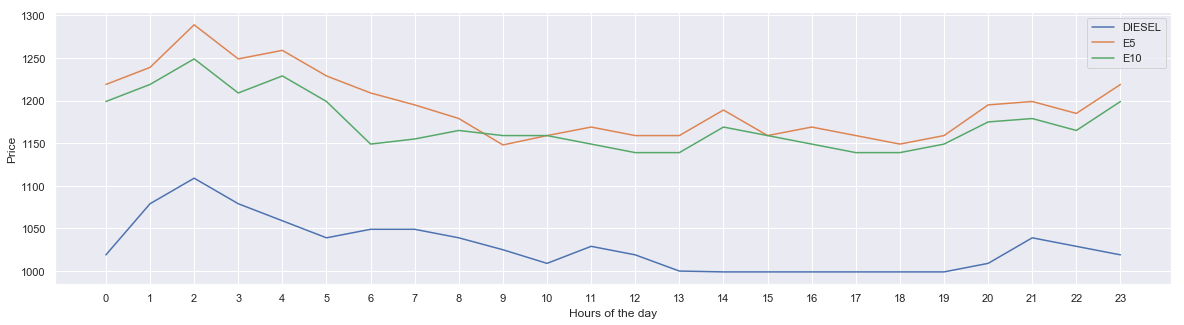

In [85]:
h_avg.plot.line(figsize=(20,5),xticks=range(0,24,1))
plt.legend(loc='upper right')
plt.xlabel('Hours of the day')
plt.ylabel('Price')

# 6. How many different locations are present in the data (visualize via a map)

In [108]:
pip install folium


The following command must be run outside of the IPython shell:

    $ pip install folium

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [109]:
locations = d1[['LAT','LNG']]
locations.drop_duplicates(inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
import folium
map = folium.Map(location=[49.633409, 8.273847], zoom_start=7)
for point in range(0, len(locations)):
    folium.Marker([locations.iloc[point,0],locations.iloc[point,1]], popup="test").add_to(map)
map

# 7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gas types

In [118]:
z=d1.BRAND.value_counts()

In [119]:
z

SHELL                                                                    190298
ARAL                                                                     181216
ESSO                                                                     119358
AVIA                                                                     114336
TOTAL                                                                     79207
JET                                                                       69325
BFT                                                                       48314
AGIP                                                                      35646
OMV                                                                       28661
SUPERMARKT-TANKSTELLE AM REAL- MARKT                                      25838
OIL!                                                                      21107
HEM                                                                       14286
SUPERMARKT TANKSTELLE                   

In [93]:
shell=dff[dff['BRAND']=='SHELL']

In [94]:
shell.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
22424,eb39e146-8263-4093-835d-30c8073e2eb2,1399.0,1379.0,1139.0,2015-08-13 14:50:01,21,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,SHELL,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197
22426,eb39e146-8263-4093-835d-30c8073e2eb2,1379.0,1359.0,1139.0,2015-08-13 15:18:01,20,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,SHELL,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197
22428,eb39e146-8263-4093-835d-30c8073e2eb2,1409.0,1389.0,1139.0,2015-08-14 13:14:01,20,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,SHELL,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197
22430,eb39e146-8263-4093-835d-30c8073e2eb2,1399.0,1379.0,1139.0,2015-08-14 13:30:01,20,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,SHELL,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197
22432,eb39e146-8263-4093-835d-30c8073e2eb2,1419.0,1399.0,1169.0,2015-08-15 12:02:01,21,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,SHELL,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197


Text(0, 0.5, 'Price in Euros')

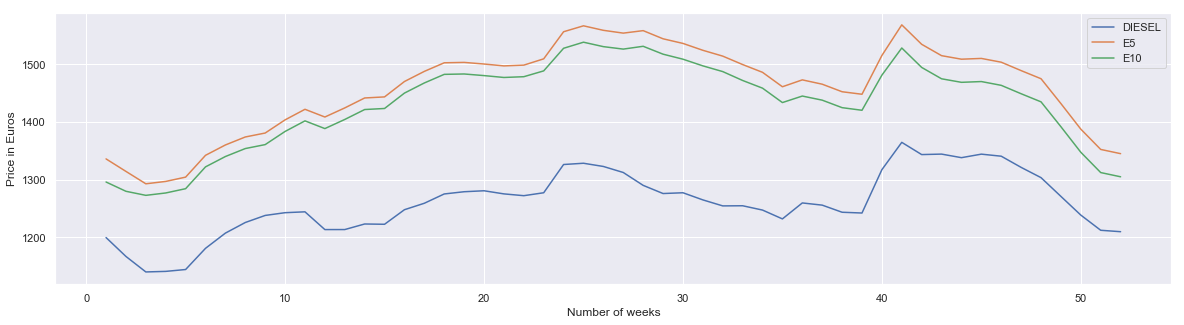

In [95]:
plt.figure(figsize=(20,5))
max_plot_e5 = shell.groupby(shell.DATE_CHANGED.dt.week).DIESEL.mean().plot(label='DIESEL')
mean_plot_e5 = shell.groupby(shell.DATE_CHANGED.dt.week).E5.mean().plot(label='E5')
min_plot_e5 = shell.groupby(shell.DATE_CHANGED.dt.week).E10.mean().plot(label='E10')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')

# 8. At which hour during a day do we have the most price changes

In [89]:
price_brand=d1[['BRAND','E5','E10','DIESEL','DATE_CHANGED']]

Text(0, 0.5, 'Price chab=nge count')

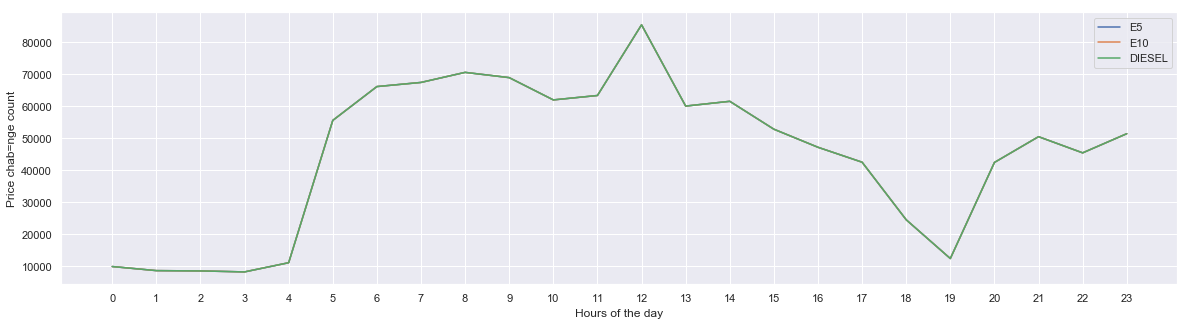

In [90]:
price_change=price_brand.groupby(price_brand.DATE_CHANGED.dt.hour)['E5','E10','DIESEL'].count().plot(figsize=(20,5),xticks=range(0,24))
plt.xlabel('Hours of the day')
plt.ylabel('Price chab=nge count')

We have most price changes at 12 hr of day.

# 9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel.

In [122]:
# 20 stations having longest time history
z

SHELL                                                                    190298
ARAL                                                                     181216
ESSO                                                                     119358
AVIA                                                                     114336
TOTAL                                                                     79207
JET                                                                       69325
BFT                                                                       48314
AGIP                                                                      35646
OMV                                                                       28661
SUPERMARKT-TANKSTELLE AM REAL- MARKT                                      25838
OIL!                                                                      21107
HEM                                                                       14286
SUPERMARKT TANKSTELLE                   

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

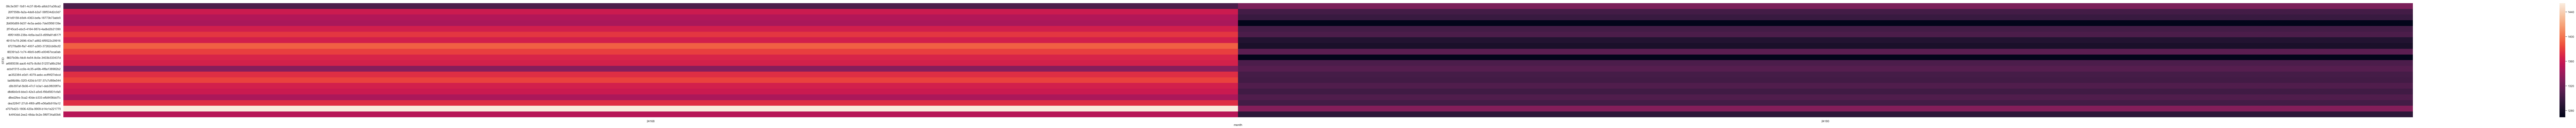

In [128]:
df9=d1.drop_duplicates(subset=['STID'])
df9['VERSION_TIME']= pd.to_datetime(df9['VERSION_TIME'])
df9['today']=pd.datetime.now()
df9['Age_in_days']=[int(i.days) for i in (df9['today']-df9['VERSION_TIME'])]
df9=df9.sort_values(by=['Age_in_days'],ascending=0)[:20]
df_9=d1.copy()
list_of_stations=list(df9['STID'])
df_9=df_9[df_9['STID'].isin(list_of_stations)]
df_9['month_of_year']=[int(i.month) for i in (df_9['DATE_CHANGED'])]
df_9['year']=[int(i.year) for i in (df_9['DATE_CHANGED'])]
df_9['month']=(df_9['year']*12)
df_9['month_of_year']
df_9['hour']=[int(i.hour) for i in (df_9['DATE_CHANGED'])]
df_9=df_9[df_9['hour']==12]
df_9_final=pd.DataFrame()
df_9_filter=df_9.groupby(['STID','month'],as_index=False)
df_9_final=pd.DataFrame(list(df_9_filter.groups.keys()), columns =['STID','month'])
df_9_final['Average_Price']=(df_9_filter['E10'].mean()['E10']+df_9_filter['DIESEL'].mean()['DIESEL'])/2
df_9_final = df_9_final.pivot("STID", "month", "Average_Price")
sns.heatmap(df_9_final)


# 10. Describe a possible business potential in € for the customer (textual description in the ipyhton file)

Business Description : 
    The fuel prices are quite fluctuating hence it is necessary to consider different parameters before filling the fuel as it would prove economical.
    
    Different parameters like location, brand, day of the week and time of the day should be taken into consideration as these are the effecting parameters.
    
    The cheapest station in average is "Ludwigshafen Industriestr. 51", so it will be economical to fill fuel at this station.
    
    Try filling fuel on Saturdays as it is cheapest.
    
    E5 is cheapest at 9 hr of day, E10 cheaper at 12 hr of day and diesel is cheaper at 14 hr of day, so it would be preferable to fill fuel at these hrs of day.
    
    Maximum price changes are at 12 hr of day so it is not recommended to fill fuel at this time.